# Time Complexity of fdiag and bdiag
Compare the time complexity of the specialized functions fdiag() and bdiag() which extract the "fowards" and "backwards" diagonal of a matrix to the built-in numpy diag() function and diag(fliplr()), respectively.  


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import time
from numpy import diag, fliplr, array


## Define fdiag() and bdiag()

In [2]:
def fdiag(board, shift=0):
    """
    Extract the foward diagonal from the board matrix
     * shift==0 extracts the main diagonal
     * shift>0 extracts the shift-th super-diagonal
     * shift<0 extracts the shift-th sub-diagonal
    """
    
    if shift==0:
        n = min(h,w)
        return [board[k,k] for k in range(n)]
    elif shift>0:
        n = min(h,w-shift)
        return [board[k,k+shift] for k in range(n)]
    else:
        shift *=-1
        n = min(h-shift,w)
        return [board[k+shift,k] for k in range(n)]

def bdiag(board, shift=0):
    """
    Equivalent to reversing the row order of the 
    board matrix and then applying fdiag.
    """
    
    if shift==0:
        n = min(h,w)
        return [board[k,w-k-1] for k in range(n)]
    elif shift>0:
        n = min(h,w-shift)
        return [board[k,w-(k+shift)-1] for k in range(n)]
    else:
        shift *=-1
        n = min(h-shift,w)
        return [board[k+shift,w-k-1] for k in range(n)]   

## Verify Correctness of fdiag() and bdiad() Visually 

In [3]:
# create a 4x5 board
def make_board(h,w):
    return array([list(range(i*w,(i+1)*w)) for i in range(h)])

h,w = 4,5
board = make_board(h,w)

print('Visually verify fdiag on a 4x5 board')
print(board)
for k in range(1-h, w):
    print('\tshift={} : {}'.format(k,fdiag(board, shift=k)))

print('Visually verify bdiag on a 4x5 board')
print(board)
for k in range(1-h, w):
    print('\tshift={} : {}'.format(k,bdiag(board, shift=k)))

Visually verify fdiag on a 4x5 board
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]
	shift=-3 : [15]
	shift=-2 : [10, 16]
	shift=-1 : [5, 11, 17]
	shift=0 : [0, 6, 12, 18]
	shift=1 : [1, 7, 13, 19]
	shift=2 : [2, 8, 14]
	shift=3 : [3, 9]
	shift=4 : [4]
Visually verify bdiag on a 4x5 board
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]
	shift=-3 : [19]
	shift=-2 : [14, 18]
	shift=-1 : [9, 13, 17]
	shift=0 : [4, 8, 12, 16]
	shift=1 : [3, 7, 11, 15]
	shift=2 : [2, 6, 10]
	shift=3 : [1, 5]
	shift=4 : [0]


## Verify Correctness of fdiag() and bdiad() with numpy Equivalents

In [4]:
good = True
for h in range(2,6):
    for w in range(2,6):
        print('Checking board of size {}x{}:'.format(h,w))
        board = make_board(h,w)
        for k in range(1-h, w):
            if any(fdiag(board, k) != diag(board,k)):
                print('  fdiag NOT EQAUL to numpy equivalent for k={}'.format(k))
                good = False
            if any(bdiag(board, k) != diag(fliplr(board),k)):
                print('  bdiag NOT EQAUL to numpy equivalent for k={}'.format(k))
                good = False
if good: print('All super and sub diagonals verified!')

Checking board of size 2x2:
Checking board of size 2x3:
Checking board of size 2x4:
Checking board of size 2x5:
Checking board of size 3x2:
Checking board of size 3x3:
Checking board of size 3x4:
Checking board of size 3x5:
Checking board of size 4x2:
Checking board of size 4x3:
Checking board of size 4x4:
Checking board of size 4x5:
Checking board of size 5x2:
Checking board of size 5x3:
Checking board of size 5x4:
Checking board of size 5x5:
All super and sub diagonals verified!


## Compare Time Complexities
Run and time 10,000 simulations on different sized grids

### Forward Diagonal Comparison

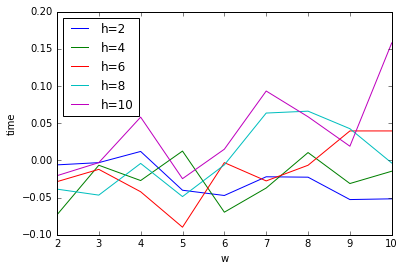

In [5]:
N = 10000

for h in range(2, 11, 2):
    my_duration = []
    np_duration = []
    for w in range(2, 11):
        
        board = make_board(h,w)
        
        # time my function
        start = time.time()
        for rep in range(N):
            for k in range(1-h, w): fdiag(board,k)
        my_duration.append(time.time() - start)

        # time numpy function
        start = time.time()
        for rep in range(N):
            for k in range(1-h, w): diag(board,k)
        np_duration.append(time.time() - start)
    plt.plot(range(2,11), 
             list(map(lambda x: x[0]-x[1], zip(my_duration, np_duration))),
             label='h={}'.format(h))
plt.legend(loc=0)
plt.xlabel('w')
plt.ylabel('time')

### Backward Diagonal Comparison

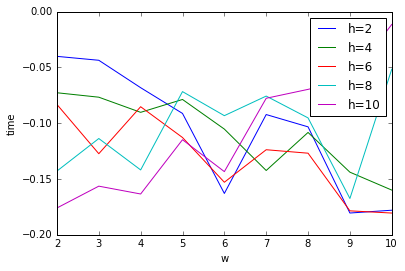

In [6]:
N = 10000

for h in range(2, 11, 2):
    my_duration = []
    np_duration = []
    for w in range(2, 11):
        
        board = make_board(h,w)
        
        # time my function
        start = time.time()
        for rep in range(N):
            for k in range(1-h, w): bdiag(board,k)
        my_duration.append(time.time() - start)

        # time numpy function
        start = time.time()
        for rep in range(N):
            for k in range(1-h, w): diag(fliplr(board),k)
        np_duration.append(time.time() - start)
    plt.plot(range(2,11), 
             list(map(lambda x: x[0]-x[1], zip(my_duration, np_duration))),
             label='h={}'.format(h))
plt.legend(loc=0)
plt.xlabel('w')
plt.ylabel('time')    
    

## Conclusion
As expected, the specialized backwards diagonal extraction is more efficient than flipping the rows of the matrix and then applying diag.  For most practical board sizes, it is better to use numpy's diag function for forward diagonal extraction.